Homework5_Lochan_Basyal

In [ ]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5621 - acc: 0.7420 - val_loss: 0.4292 - val_acc: 0.8613
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3523 - acc: 0.8889 - val_loss: 0.3459 - val_acc: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2588 - acc: 0.9160 - val_loss: 0.2897 - val_acc: 0.8891
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2077 - acc: 0.9305 - val_loss: 0.2856 - val_acc: 0.8828
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1758 - acc: 0.9402 - val_loss: 0.2759 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1498 - acc: 0.9503 - val_loss: 0.2858 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1267 - acc: 0.9599 - val_loss: 0.2916 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1101 - a

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

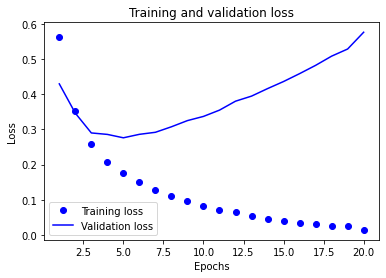

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Part 1: Compare the different compiler setups


Use the same set of IMDB data in the posted IMDB.ipynb file:

List the comparison results with each setup variations and explain your observations.

We used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

Try using the mse loss function instead of binary_crossentropy.

Try using the tanh activation (an activation that was popular in the early days of

neural networks) instead of relu.



Task 1: Neural Network with 1 Layer

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 116ms/step - loss: 0.5129 - acc: 0.7933 - val_loss: 0.4095 - val_acc: 0.8517
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.3385 - acc: 0.8927 - val_loss: 0.3320 - val_acc: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2682 - acc: 0.9144 - val_loss: 0.2994 - val_acc: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2273 - acc: 0.9263 - val_loss: 0.2832 - val_acc: 0.8886
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1960 - acc: 0.9379 - val_loss: 0.2850 - val_acc: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1751 - acc: 0.9461 - val_loss: 0.2886 - val_acc: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1574 - acc: 0.9521 - val_loss: 0.2813 - val_acc: 0.8853
Epoch 8/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1443 - 

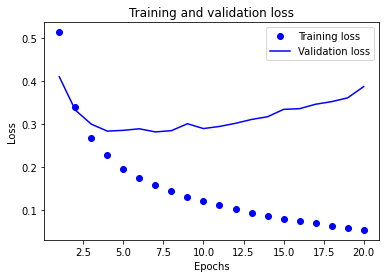

In [ ]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Neural Network with 3 hiden layers

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5520 - acc: 0.7491 - val_loss: 0.4293 - val_acc: 0.8340
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3284 - acc: 0.8889 - val_loss: 0.3112 - val_acc: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2363 - acc: 0.9167 - val_loss: 0.2874 - val_acc: 0.8865
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1834 - acc: 0.9377 - val_loss: 0.2799 - val_acc: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1545 - acc: 0.9486 - val_loss: 0.2929 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1325 - acc: 0.9567 - val_loss: 0.3529 - val_acc: 0.8664
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1103 - acc: 0.9637 - val_loss: 0.3132 - val_acc: 0.8842
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0901 - a

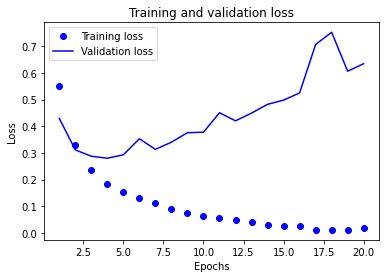

In [ ]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

With 5 hidden units and varying neurons in each layer

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.5598 - acc: 0.7291 - val_loss: 0.4414 - val_acc: 0.8029
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3021 - acc: 0.8829 - val_loss: 0.2888 - val_acc: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2120 - acc: 0.9208 - val_loss: 0.2786 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1495 - acc: 0.9465 - val_loss: 0.3604 - val_acc: 0.8742
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1306 - acc: 0.9523 - val_loss: 0.4043 - val_acc: 0.8729
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1167 - acc: 0.9573 - val_loss: 0.3416 - val_acc: 0.8791
Epoch 7/20
30/30 [==============================] - 2s 64ms/step - loss: 0.0693 - acc: 0.9785 - val_loss: 0.4295 - val_acc: 0.8739
Epoch 8/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0880 - a

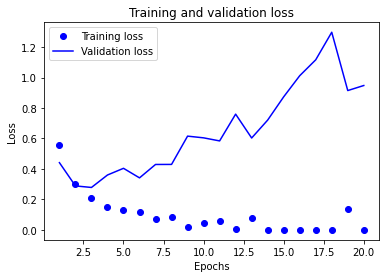

In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(256, activation='relu'))

model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Using MSE loss function

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.2007 - acc: 0.7058 - val_loss: 0.1265 - val_acc: 0.8485
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1045 - acc: 0.8789 - val_loss: 0.1088 - val_acc: 0.8655
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0778 - acc: 0.9143 - val_loss: 0.1176 - val_acc: 0.8422
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0639 - acc: 0.9317 - val_loss: 0.1041 - val_acc: 0.8655
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0488 - acc: 0.9531 - val_loss: 0.1051 - val_acc: 0.8710
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0372 - acc: 0.9684 - val_loss: 0.1194 - val_acc: 0.8466
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0315 - acc: 0.9753 - val_loss: 0.1004 - val_acc: 0.8799
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0253 - 

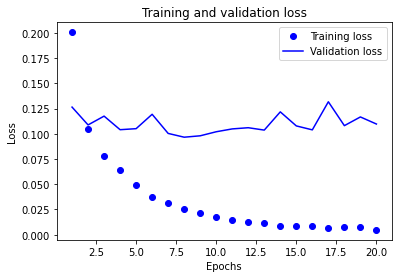

In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_4.add(layers.Dense(16, activation='relu'))
model_4.add(layers.Dense(1, activation='relu'))

model_4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Using tanh activation function

Epoch 1/20
30/30 [==============================] - 4s 113ms/step - loss: 0.2106 - acc: 0.7075 - val_loss: 0.1331 - val_acc: 0.8308
Epoch 2/20
30/30 [==============================] - 3s 88ms/step - loss: 0.1185 - acc: 0.8655 - val_loss: 0.1148 - val_acc: 0.8605
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0946 - acc: 0.9029 - val_loss: 0.1216 - val_acc: 0.8315
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0770 - acc: 0.9243 - val_loss: 0.1136 - val_acc: 0.8725
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0689 - acc: 0.9313 - val_loss: 0.1141 - val_acc: 0.8677
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0606 - acc: 0.9429 - val_loss: 0.1006 - val_acc: 0.8741
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0526 - acc: 0.9524 - val_loss: 0.0950 - val_acc: 0.8789
Epoch 8/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0460 - 

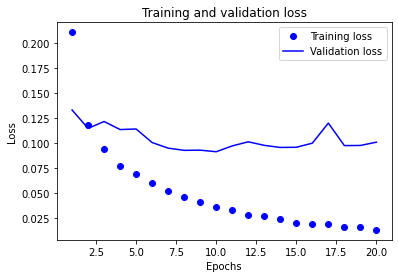

In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_4.add(layers.Dense(16, activation='tanh'))
model_4.add(layers.Dense(1, activation='tanh'))

model_4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observation from Task1:
Compare the different compiler setups




When I initially used only one hidden layer, I observed that the model had low bias but high variance, indicating that it performed well on the training data but poorly on the test data. To address this, I increased the number of hidden layers to three with equal neurons per layer, but this did not overcome the bias-variance tradeoff. Subsequently, I tried a Neural Network with 5 hidden layers, and while the training loss continued to decrease, the validation loss started increasing, indicating that the model was overfitting the training data and showing an unusual nature in the testing dataset. This may have been due to the limited dataset used during the training process since only partial data from the entire dataset was utilized.

Furthermore, when I compared using mse as a loss function with relu activation and mse loss function with tanh activation, I observed slightly better performance in the second case.

Part 2:  Examine the impact of regularization and dropout.

Use the python scripts with fashion_mnist data in HW 3 and testify the impact of adding or without adding the regularization and the impact of adding or without adding the dropout.

Task 1: add the regularization  



In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import regularizers

seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

4422102/4422102 [==============================] - 0s 0us/step


Task 1: Adding Regularizer

Epoch 1/20
118/118 [==============================] - 4s 28ms/step - loss: 0.3808 - acc: 0.7090 - val_loss: 0.1925 - val_acc: 0.7567
Epoch 2/20
118/118 [==============================] - 3s 27ms/step - loss: 0.1199 - acc: 0.7835 - val_loss: 0.0755 - val_acc: 0.7767
Epoch 3/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0569 - acc: 0.7934 - val_loss: 0.0556 - val_acc: 0.7304
Epoch 4/20
118/118 [==============================] - 3s 24ms/step - loss: 0.0416 - acc: 0.7928 - val_loss: 0.0457 - val_acc: 0.7329
Epoch 5/20
118/118 [==============================] - 3s 25ms/step - loss: 0.0371 - acc: 0.7956 - val_loss: 0.0439 - val_acc: 0.7459
Epoch 6/20
118/118 [==============================] - 3s 26ms/step - loss: 0.0366 - acc: 0.7919 - val_loss: 0.0402 - val_acc: 0.7550
Epoch 7/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0359 - acc: 0.7933 - val_loss: 0.0455 - val_acc: 0.7263
Epoch 8/20
118/118 [==============================] - 3s 24ms/step - 

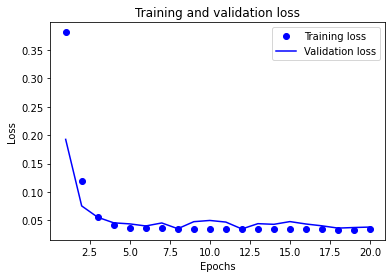

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = network.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_test, y_test))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Task 2: Adding Dropout

Epoch 1/20
118/118 [==============================] - 5s 31ms/step - loss: 0.0426 - acc: 0.7023 - val_loss: 0.0323 - val_acc: 0.7806
Epoch 2/20
118/118 [==============================] - 5s 39ms/step - loss: 0.0298 - acc: 0.7991 - val_loss: 0.0288 - val_acc: 0.8013
Epoch 3/20
118/118 [==============================] - 3s 29ms/step - loss: 0.0266 - acc: 0.8195 - val_loss: 0.0261 - val_acc: 0.8199
Epoch 4/20
118/118 [==============================] - 3s 29ms/step - loss: 0.0248 - acc: 0.8316 - val_loss: 0.0257 - val_acc: 0.8222
Epoch 5/20
118/118 [==============================] - 4s 36ms/step - loss: 0.0238 - acc: 0.8381 - val_loss: 0.0253 - val_acc: 0.8231
Epoch 6/20
118/118 [==============================] - 4s 30ms/step - loss: 0.0226 - acc: 0.8475 - val_loss: 0.0230 - val_acc: 0.8434
Epoch 7/20
118/118 [==============================] - 3s 28ms/step - loss: 0.0221 - acc: 0.8495 - val_loss: 0.0239 - val_acc: 0.8358
Epoch 8/20
118/118 [==============================] - 3s 29ms/step - 

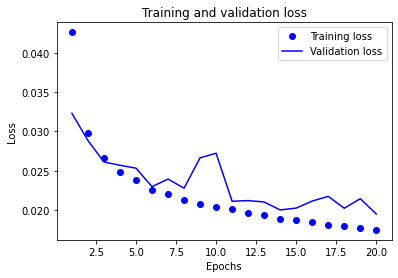

In [ ]:
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))


network_dropout.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = network_dropout.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_test, y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now Adding both Regularizer and Dropout

Epoch 1/20
118/118 [==============================] - 6s 34ms/step - loss: 1.2913 - acc: 0.2863 - val_loss: 0.0875 - val_acc: 0.3186
Epoch 2/20
118/118 [==============================] - 4s 35ms/step - loss: 0.0851 - acc: 0.3497 - val_loss: 0.0829 - val_acc: 0.3750
Epoch 3/20
118/118 [==============================] - 5s 41ms/step - loss: 0.0825 - acc: 0.4111 - val_loss: 0.0802 - val_acc: 0.4679
Epoch 4/20
118/118 [==============================] - 4s 31ms/step - loss: 0.0809 - acc: 0.4352 - val_loss: 0.0871 - val_acc: 0.3211
Epoch 5/20
118/118 [==============================] - 4s 30ms/step - loss: 0.0799 - acc: 0.4492 - val_loss: 0.0775 - val_acc: 0.4313
Epoch 6/20
118/118 [==============================] - 5s 40ms/step - loss: 0.0785 - acc: 0.4704 - val_loss: 0.0796 - val_acc: 0.4568
Epoch 7/20
118/118 [==============================] - 4s 30ms/step - loss: 0.0779 - acc: 0.4790 - val_loss: 0.0740 - val_acc: 0.5892
Epoch 8/20
118/118 [==============================] - 4s 32ms/step - 

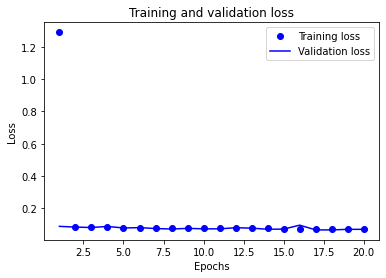

In [ ]:
network_dropout_regularizer = models.Sequential()
network_dropout_regularizer.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(28 * 28,)))
network_dropout_regularizer.add(layers.Dropout(0.4))
network_dropout_regularizer.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(28 * 28,)))
network_dropout_regularizer.add(layers.Dropout(0.4))

network_dropout_regularizer.add(layers.Dense(10, activation='softmax'))


network_dropout_regularizer.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = network_dropout_regularizer.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_test, y_test))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Part 2:  Examine the impact of regularization and dropout.




Observation:

By incorporating regularizers into the layer, it is possible to improve the balance between bias and variance. I assessed the performance of the Neural Network with three different techniques: L2 regularizer, dropout, and a combination of dropout and L2 regularizer. The model with L2 regularizer exhibited good performance in terms of accuracy on the testing dataset compared to the model without any regularization. Moreover, the addition of dropout helped to mitigate the bias-variance tradeoff. The combination of dropout and L2 regularization shows the best technique in minimizing the bias-variance tradeoff and any overfitting issues in my customized network with tuning parameters.